In [1]:
#from pyzbar.pyzbar import decode
from PIL import Image
from pylibdmtx.pylibdmtx import decode
import numpy as np
from scipy import ndimage
from scipy import fftpack
import matplotlib.pyplot as plt
from skimage import exposure
from matplotlib.patches import Rectangle
from skimage.restoration import denoise_tv_chambolle,estimate_sigma,denoise_bilateral

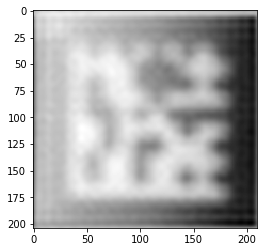

In [8]:
npImage = np.array(Image.open('C:/Users/Varun Makdani/Desktop/QR/eddy_current_2_crop.jpg').convert("L"))
#plt.imshow(npImage,cmap = "gray")
im_fft = fftpack.fft2(npImage)
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
im_new = fftpack.ifft2(im_fft2).real
plt.imshow(im_new,cmap = "gray")
# sigma_est = estimate_sigma(im_new,multichannel=False,average_sigmas=True)
# sigma_est
# gauss_denoised = ndimage.gaussian_filter(im_new, sigma_est )
# image_equalized = exposure.equalize_hist(gauss_denoised)
# plt.imshow(image_equalized,cmap = "gray")

# qr1 = decode(image_equalized)

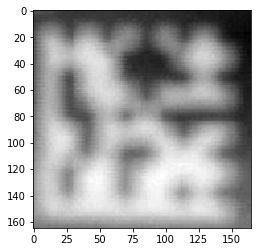

In [17]:
npImage = np.array(Image.open('C:/Users/Varun Makdani/Desktop/QR/eddy_current_3_crop.jpg').convert("L"))
plt.imshow(npImage,cmap = "gray")
qr = decode(npImage)

In [18]:
sigma_est = estimate_sigma(npImage,multichannel=False,average_sigmas=True)
sigma_est

0.4566603151533058

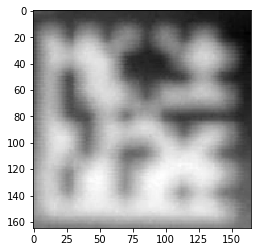

In [19]:
gauss_denoised = ndimage.gaussian_filter(npImage, sigma_est )

figure, ax = plt.subplots(1)

ax.imshow(gauss_denoised,cmap = "gray")
qr = decode(gauss_denoised)

if(len(qr) !=0):
    rect = Rectangle((qr[0].rect.left,qr[0].rect.top),qr[0].rect.width,qr[0].rect.height, edgecolor='r',        facecolor="none")
    ax.add_patch(rect)
    print(qr[0].rect)

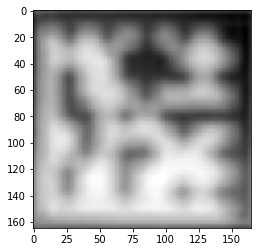

In [22]:
im_fft = fftpack.fft2(gauss_denoised)
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
im_new = fftpack.ifft2(im_fft2).real

figure, ax = plt.subplots(1)

ax.imshow(im_new,cmap = "gray")
qr = decode(im_new)

if(len(qr) !=0):
    rect = Rectangle((qr[0].rect.left,qr[0].rect.top),qr[0].rect.width,qr[0].rect.height, edgecolor='r',        facecolor="none")
    ax.add_patch(rect)
    print(qr[0].rect)

([], <a list of 0 Text yticklabel objects>)

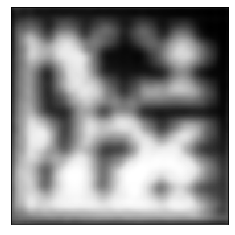

In [23]:
image_equalized = exposure.equalize_hist(im_new)
#image_rescale_int = exposure.rescale_intensity(255*tvchambole_denoised,in_range=(0,255))
figure, ax = plt.subplots(1)

ax.imshow(image_equalized,cmap = "gray")
qr = decode(image_equalized)

if(len(qr) !=0):
    rect = Rectangle((qr[0].rect.left,qr[0].rect.top),qr[0].rect.width,qr[0].rect.height, edgecolor='r',        facecolor="none")
    ax.add_patch(rect)
    print(qr[0].rect)
plt.xticks([])
plt.yticks([])